In [1]:
import sys
sys.path.append("..")
import jsq_ps.models as jsq
import aux.models as aux
import numpy as np
import matplotlib.pyplot as plt
import ciw
import math

In [2]:
def compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times):
    # Simulation
    S = jsq.Simulation(lambda_, mu, R, max_time, warmup)
    S.run(0)
    S.find_sojourn_time_cdf(times)
    
    # Method 1
    M1 = jsq.Method1(lambda_, mu, R, mc_limit, infty)
    M1.find_sojourn_time_cdf(times)
    
    # Method 2
    M2 = jsq.Method2(lambda_, mu, R, infty)
    M2.find_sojourn_time_cdf(times)
    
    rho = lambda_ / (R * mu)
    
    fig, ax = plt.subplots(1, figsize=(15, 4))
    ax.plot(times, S.sojourn_time_cdf, label='Simulation')
    ax.plot(times, M1.sojourn_time_cdf, label='Method 1')
    ax.plot(times, M2.sojourn_time_cdf, label='Method 2')
    ax.set_ylabel('P(S < s)', fontsize=16)
    ax.set_xlabel('s', fontsize=16)
    ax.legend(loc=0, fontsize=16)
    ax.set_title(f"ρ = {round(rho, 4)}")
    plt.show()

100%|██████████| 40000.0/40000 [00:22<00:00, 1766.02it/s]           


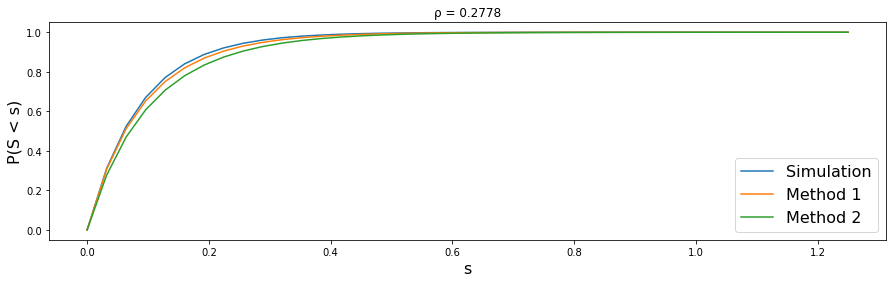

In [3]:
# Parameters
lambda_ = 10
mu = 12
R = 3

# Hyperparameters
max_time = 40000
warmup = 200
mc_limit = 12
infty = 130
zero = 0
times = np.linspace(0, 1.25, 40)

compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times)

100%|██████████| 40000.0/40000 [00:18<00:00, 2136.70it/s]           


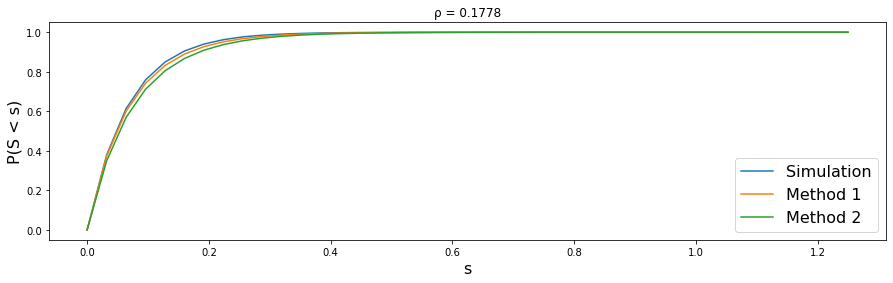

In [4]:
# Parameters
lambda_ = 8
mu = 15
R = 3

# Hyperparameters
max_time = 40000
warmup = 200
mc_limit = 12
infty = 130
zero = 0
times = np.linspace(0, 1.25, 40)

compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times)

100%|██████████| 40000.0/40000 [00:33<00:00, 1207.83it/s]           


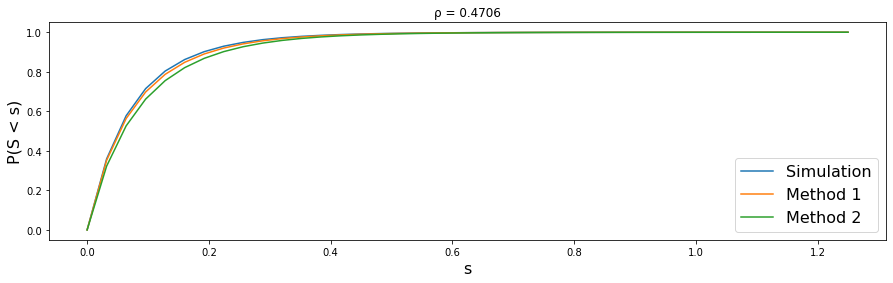

In [5]:
# Parameters
lambda_ = 16
mu = 17
R = 2

# Hyperparameters
max_time = 40000
warmup = 200
mc_limit = 28
infty = 130
zero = 0
times = np.linspace(0, 1.25, 40)

compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times)

100%|██████████| 40000.0/40000 [00:12<00:00, 3125.89it/s]           


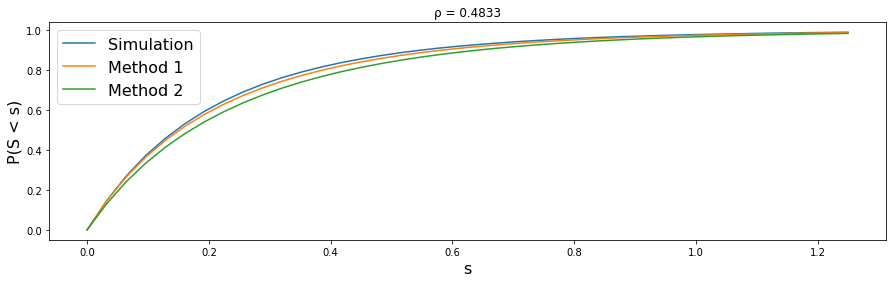

In [6]:
# Parameters
lambda_ = 5.8
mu = 6
R = 2

# Hyperparameters
max_time = 40000
warmup = 200
mc_limit = 28
infty = 130
zero = 0
times = np.linspace(0, 1.25, 40)

compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times)

## I messed up a little

In all the above examples $\lambda < \mu$ as I was trying to get $\rho < 1$, but I forgot that here $\rho = \frac{\lambda}{R\mu}$. So all the above are very small values for $\rho$.

So below I try some bigger values of $\rho$.

100%|██████████| 4000.0/4000 [00:03<00:00, 1067.76it/s]            


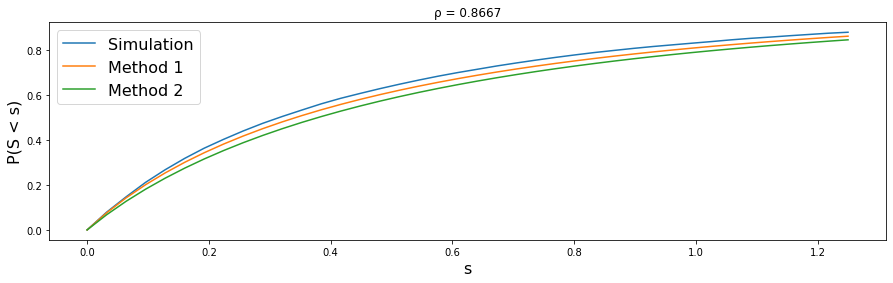

In [7]:
# Parameters
lambda_ = 13
mu = 5
R = 3

# Hyperparameters
max_time = 4000
warmup = 200
mc_limit = 12
infty = 130
zero = 0
times = np.linspace(0, 1.25, 40)

compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times)

100%|██████████| 40000.0/40000 [00:26<00:00, 1512.39it/s]           


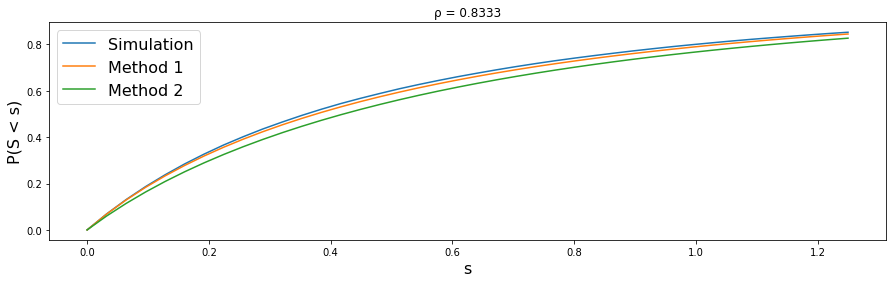

In [8]:
# Parameters
lambda_ = 10
mu = 4
R = 3

# Hyperparameters
max_time = 40000
warmup = 200
mc_limit = 12
infty = 130
zero = 0
times = np.linspace(0, 1.25, 40)

compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times)

100%|██████████| 40000.0/40000 [00:28<00:00, 1401.79it/s]           


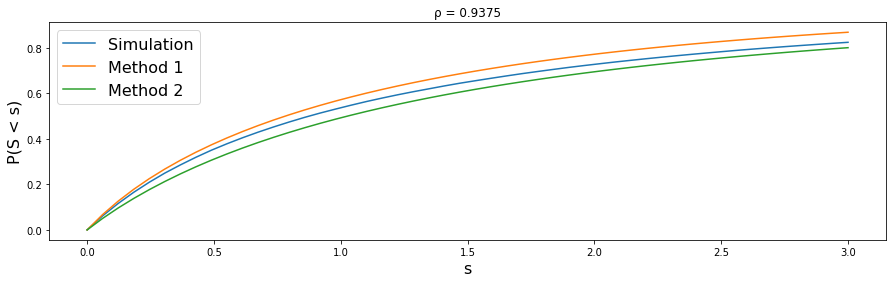

In [9]:
# Parameters
lambda_ = 9
mu = 3.2
R = 3

# Hyperparameters
max_time = 40000
warmup = 200
mc_limit = 12
infty = 130
zero = 0
times = np.linspace(0, 3, 50)

compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times)

### So now Method 1 isn't great... but surely Method 1 is exact? Let's investigate...

100%|██████████| 40000.0/40000 [00:28<00:00, 1397.03it/s]           


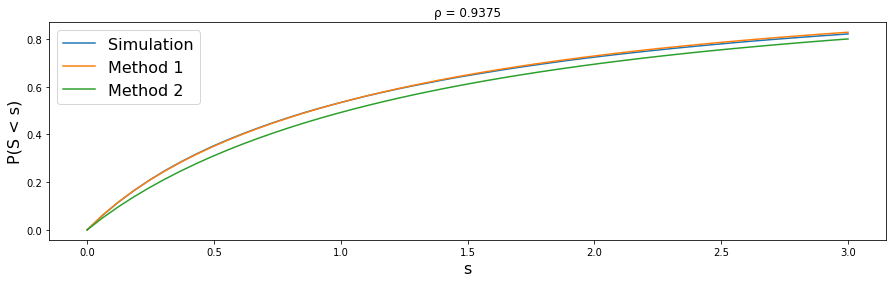

In [10]:
# Parameters
lambda_ = 9
mu = 3.2
R = 3

# Hyperparameters
max_time = 40000
warmup = 2000
mc_limit = 20
infty = 150
zero = 0
times = np.linspace(0, 3, 50)

compare(lambda_, mu, R, max_time, warmup, mc_limit, infty, zero, times)

### Increasing the Markov chain limit helps. The problem was that with this $\rho$, there is a good chance that the number of people at one server is more than the limit. We can check by looking at the Simulation results in more detail:

In [11]:
lambda_ = 9
mu = 3.2
R = 3

# Hyperparameters
max_time = 40000
warmup = 2000
times = np.linspace(0, 3, 50)

S = jsq.Simulation(lambda_, mu, R, max_time, 2000, tracker=ciw.trackers.NodePopulationSubset([1, 2, 3]))
S.run(0)
S.find_sojourn_time_cdf(times)

100%|██████████| 40000.0/40000 [00:28<00:00, 1417.53it/s]           


In [12]:
probs = S.Q.statetracker.state_probabilities(observation_period=(warmup, max_time-warmup))

In [13]:
expected_queue_lengths = [0, 0, 0]
for s in probs:
    expected_queue_lengths[0] += s[0] * probs[s]
    expected_queue_lengths[1] += s[1] * probs[s]
    expected_queue_lengths[2] += s[2] * probs[s]

In [14]:
expected_queue_lengths

[5.4862979988411, 5.481126084475279, 5.4833693229514555]

In [15]:
prob_above_limit = 0
limit = 12
for state in probs:
    if any([s > limit for s in state]):
        prob_above_limit += probs[state]

In [16]:
prob_above_limit

0.09938408388965268

### So using an `mc_limit` of 12, with these parameters we cannot capture about 10% of the states. Note also, that these are the states where customers have the longest sojourn times (as the service rate is shared between more people), therefore this affects the sojourn time massively.

In [21]:
prob_above_limit = 0
limit = 20
for state in probs:
    if any([s > limit for s in state]):
        prob_above_limit += probs[state]

In [22]:
prob_above_limit

0.018071511948876264

### Even at a limit of 20 we cannot capture 1.8% of states

In [23]:
prob_above_limit = 0
limit = 28
for state in probs:
    if any([s > limit for s in state]):
        prob_above_limit += probs[state]

In [24]:
prob_above_limit

0.0017157201771913473

### This got me thinking...

For very low rho, the sojourn time will simply be the service time distribution. If every server only ever has 1 customer, then there's no need to ever share service rate with anyone. What rho will satisfy this? Think of this as equivalent$^\star$ to an M/M/R queue and we want to find rhos that make P(queueing) as low as possible. This is the Erlang-C formula.

$\star$ Not quite equivalent. Our JSQ-PS system will spend longer with more customers, so the true P(queueing) in our system will be smaller.

In [25]:
def p0(rho, R):
    first_term = sum([((R*rho) ** n) / math.factorial(n) for n in range(R)])
    second_term = ((R*rho) ** R) / (math.factorial(R) * (1 - rho))
    return 1 / (first_term + second_term)

In [26]:
def prob_queueing(rho, R):
    po = p0(rho, R)
    top = (R * rho) ** R
    bottom = math.factorial(R) * (1 - rho)
    return (top / bottom) * po

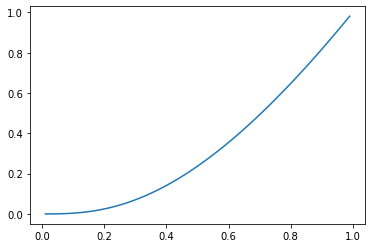

In [27]:
rhos = np.linspace(0, 1, 100)[1:-1]
plt.plot(rhos, [prob_queueing(rho, R) for rho in rhos])
plt.show()

So for very low values of rho (<0.15 day) the sojourn time distirbution is just the exponential distribution.
Let's try this:

In [28]:
def compare_sojourn_to_expon(rho, times):
    max_time = 2000
    warmup = 100
    lambda_ = 10
    mu = lambda_ / (rho * R)
    
    S = jsq.Simulation(lambda_, mu, 3, max_time, warmup)
    S.run(0)
    S.find_sojourn_time_cdf(times)
    
    expon_cdf = [1 - math.exp(-mu * t) for t in times]
    
    return S.sojourn_time_cdf, expon_cdf
    
def plot_compare_sojourn_to_expon(rho, ax):
    times = np.linspace(0, 1.25, 40)
    sim_cdf, expon_cdf = compare_sojourn_to_expon(rho, times)
    
    ax.plot(times, sim_cdf, label='Simulation')
    ax.plot(times, expon_cdf, label='Expon')
    ax.set_title(f"ρ = {rho}")

100%|██████████| 2000.0/2000 [00:01<00:00, 1899.71it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1898.40it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1920.82it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1978.56it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1839.36it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1895.98it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1822.73it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1855.16it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1854.71it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1832.30it/s]            
100%|██████████| 2000.0/2000 [00:02<00:00, 669.38it/s]             
100%|██████████| 2000.0/2000 [00:01<00:00, 1900.51it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1802.76it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1752.12it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1753.

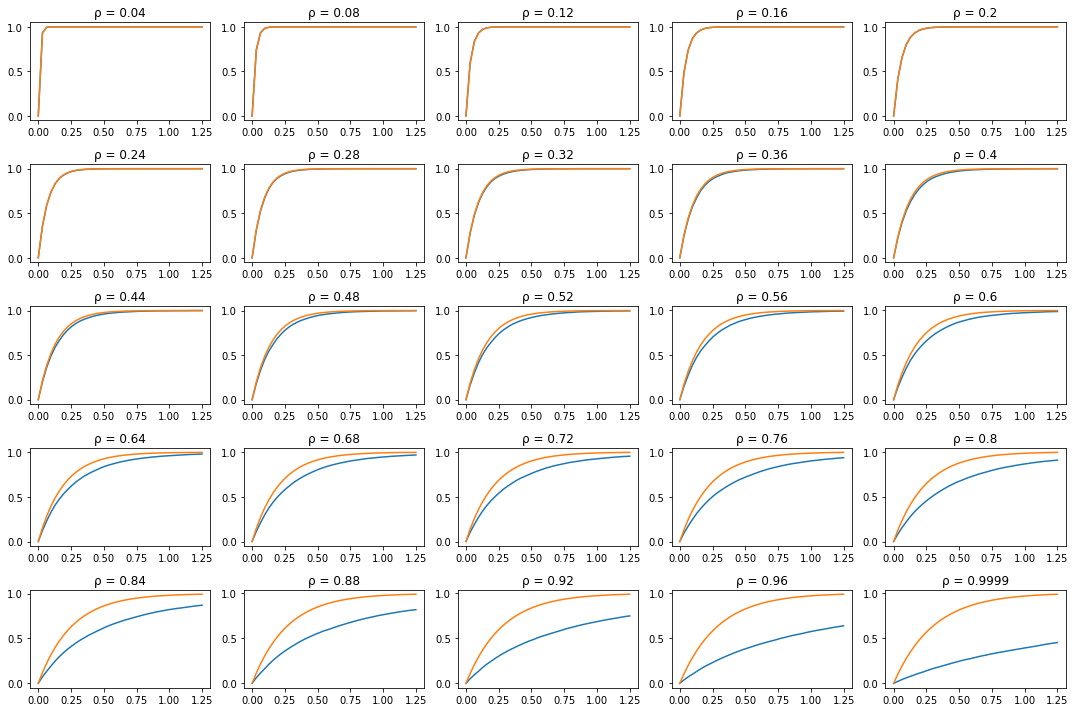

In [29]:
fig, axarr = plt.subplots(5, 5, figsize=(15, 10))
for i, rho in enumerate([0.04, 0.08, 0.12, 0.16, 0.2]):
    plot_compare_sojourn_to_expon(rho, axarr[0, i])
for i, rho in enumerate([0.24, 0.28, 0.32, 0.36, 0.4]):
    plot_compare_sojourn_to_expon(rho, axarr[1, i])
for i, rho in enumerate([0.44, 0.48, 0.52, 0.56, 0.6]):
    plot_compare_sojourn_to_expon(rho, axarr[2, i])
for i, rho in enumerate([0.64, 0.68, 0.72, 0.76, 0.8]):
    plot_compare_sojourn_to_expon(rho, axarr[3, i])
for i, rho in enumerate([0.84, 0.88, 0.92, 0.96, 0.9999]):
    plot_compare_sojourn_to_expon(rho, axarr[4, i])
plt.tight_layout()
plt.show()

Now use the Wasserstein distance between the simulation and theoretical cdfs to measure the 'error'. The larger the Wasserstein distance the more different the two distrbutions are.

In [30]:
rhos = np.append(np.linspace(0.04, 1.0, 25)[:-1], 0.9999)
times = np.linspace(0, 1.25, 40)
gap = times[1] - times[0]
wassertein = []
for rho in rhos:
    sim_cdf, expon_cdf = compare_sojourn_to_expon(rho, times)
    w = aux.wasserstein_distance(sim_cdf, expon_cdf, gap)
    wassertein.append(w)

100%|██████████| 2000.0/2000 [00:01<00:00, 1759.94it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1716.85it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1698.97it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1721.46it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1683.72it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1698.77it/s]            
100%|██████████| 2000.0/2000 [00:02<00:00, 991.75it/s]             
100%|██████████| 2000.0/2000 [00:01<00:00, 1695.12it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1664.48it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1649.38it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1655.68it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1610.44it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1013.68it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1670.97it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1634.

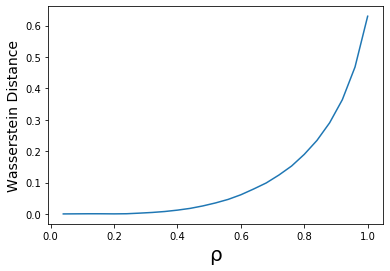

In [31]:
fig, ax = plt.subplots(1)
ax.plot(rhos, wassertein)
ax.set_xlabel('ρ', fontsize=20)
ax.set_ylabel('Wasserstein Distance', fontsize=14)
plt.show()

### It seems experimentally we can go much higher, say $\rho = 0.36$. Something to consider.

Prehaps we could propose some guidelines, e.g.
+ for $\rho < 0.36$ use Exponential cdf
+ for $0.36 < \rho < 0.8$ use Method 1
+ for $\rho > 0.8$ use Method 2

Comparing all three (mc_limit=12):

In [32]:
def compare_all_three(rho):
    max_time = 2000
    warmup = 100
    lambda_ = 10
    mu = lambda_ / (rho * R)
    mc_limit = 12
    infty = 130
    times = np.linspace(0, 1.25, 40)
    gap = times[1] - times[0]
    
    # Simulation
    S = jsq.Simulation(lambda_, mu, 3, max_time, warmup)
    S.run(0)
    S.find_sojourn_time_cdf(times)
    
    # Expon
    expon_cdf = [1 - math.exp(-mu * t) for t in times]
    
    # Method 1
    M1 = jsq.Method1(lambda_, mu, R, mc_limit, infty)
    M1.find_sojourn_time_cdf(times)
    
    # Method 2
    M2 = jsq.Method2(lambda_, mu, R, infty)
    M2.find_sojourn_time_cdf(times)
    
    w_expon = aux.wasserstein_distance(S.sojourn_time_cdf, expon_cdf, gap)
    w_M1 = aux.wasserstein_distance(S.sojourn_time_cdf, M1.sojourn_time_cdf, gap)
    w_M2 = aux.wasserstein_distance(S.sojourn_time_cdf, M2.sojourn_time_cdf, gap)
    
    return w_expon, w_M1, w_M2

In [33]:
rhos = np.append(np.linspace(0.04, 1.0, 25)[:-1], 0.9999)
times = np.linspace(0, 1.25, 40)
gap = times[1] - times[0]
wassertein_exp = []
wassertein_M1 = []
wassertein_M2 = []
for rho in rhos:
    w_e, w_1, w_2 = compare_all_three(rho)
    wassertein_exp.append(w_e)
    wassertein_M1.append(w_1)
    wassertein_M2.append(w_2)

100%|██████████| 2000.0/2000 [00:01<00:00, 1755.45it/s]            
100%|██████████| 2000.0/2000 [00:02<00:00, 910.60it/s]             
100%|██████████| 2000.0/2000 [00:01<00:00, 1673.38it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1748.95it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1727.59it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1753.04it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1704.92it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1738.90it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1048.55it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1626.07it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1587.08it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1570.59it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1692.61it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1730.35it/s]            
100%|██████████| 2000.0/2000 [00:01<00:00, 1678.

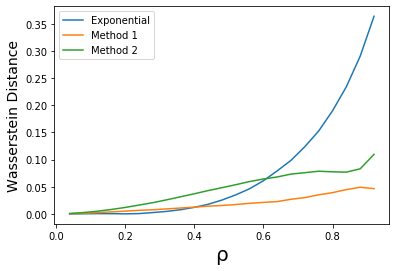

In [34]:
fig, ax = plt.subplots(1)
ax.plot(rhos[:-2], wassertein_exp[:-2], label='Exponential')
ax.plot(rhos[:-2], wassertein_M1[:-2], label='Method 1')
ax.plot(rhos[:-2], wassertein_M2[:-2], label='Method 2')
ax.legend()
ax.set_xlabel('ρ', fontsize=20)
ax.set_ylabel('Wasserstein Distance', fontsize=14)
plt.show()